## Regressao_Logistica_01

### Disciplina Inteligência Artificial

Neste jupyter vamos criar um modelo de regressão logística para classificar flores Iris entre as 3 espécies (Setosa, Versicolor e Virgínica)

Dataset: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

Características:

Número de Instâncias 150 (50 em cada uma das três classes). Número de atributos: 4 atributos numéricos, preditivos e a classe. Informações sobre atributos:

* comprimento da sépala (cm) 	sepal lenght
* largura da sépala (cm)		sepal width
* comprimento da pétala (cm)	petal lenght
* largura da pétala (cm)		petal width
* classe (TARGET)


In [ ]:
# Execute esta célula para montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline 

## Carregando o dataset

In [ ]:
# Carregando o Dataset Iris.csv com o pacote Pandas, criando o DataFrame df
df = pd.read_csv("/content/Aula05_Parte2/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Verificando os últimos registros do dataset
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Imprimindo as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Veja acima que a primeira coluna (Id) podemos ignorar, pois é apenas uma chave e que não afeta a classificação

In [ ]:
# Ignorando a primeira linha
df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Vamos verificar se existem valores nulos
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Imprimindo o describe()
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Vamos verificar o nome das colunas
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# Vamos ver o Shape dos dados
print('Shape:',df.shape)

Shape: (150, 5)


Veja que são 150 exemplos, 4 variáveis preditoras e 1 variável Alvo (Target)

## Explorando o Dataset

In [ ]:
# Distribuição do target
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Veja que temos exatamente 50 exemplos para cada espécie, indicando que as classes estão balanceadas

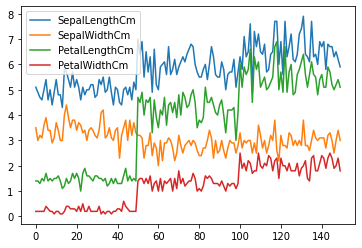

In [ ]:
# Vamos plotar o DataFrame para ver se encontramos alguma correlação entre as variáveis que determinam o resultado
df.plot()

Não foi possível encontrar uma relação. Vamos tentar de outra forma

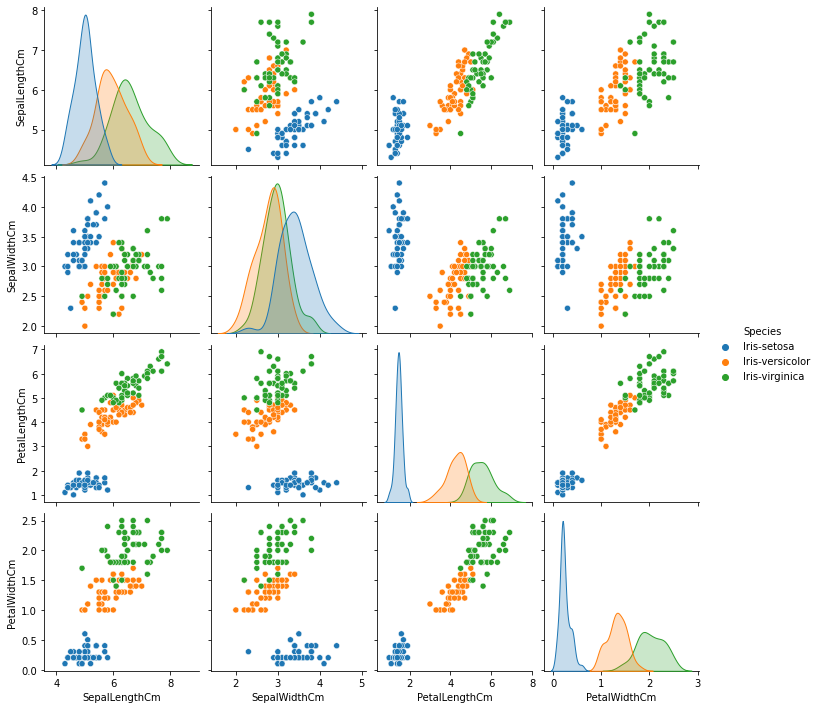

In [ ]:
g = sns.pairplot(df, hue='Species', markers='o')
plt.show()

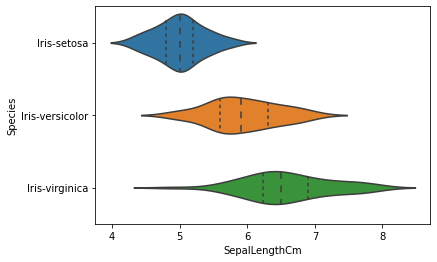

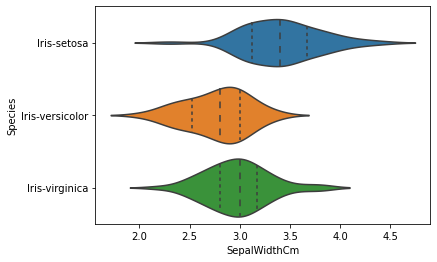

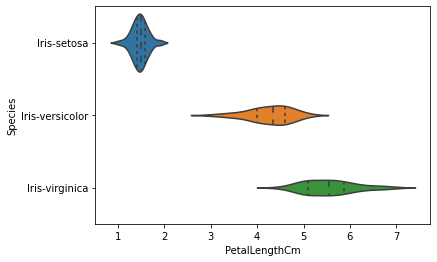

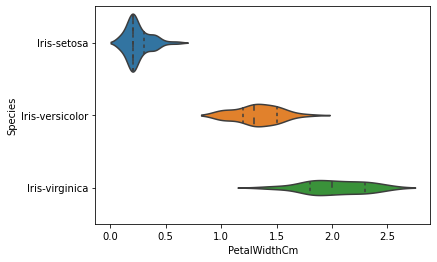

In [ ]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

Nestes gráficos podemos ver que as características PetalLenght e PetalWidth tem maior influência no resultado.

In [ ]:
# Criando uma função para plotar a correlação entre as variáveis
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = False, top = False, left = False, right = False) 
    plt.colorbar()
    plt.show()

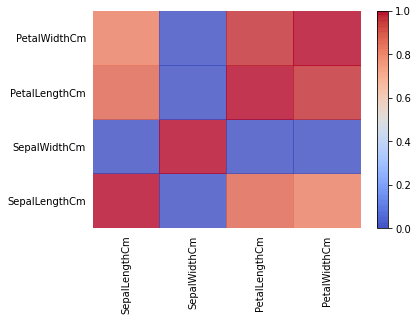

In [ ]:
# Vamos gerar a matriz de correlação entre as variáveis
tmp = df.drop('Species', axis=1)
matriz_corr = tmp.corr()
observations = len(tmp)
variables = tmp.columns
visualize_correlation_matrix(tmp, hurdle = 0.5)

In [ ]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.iloc[:,:-1]
y = df['Species'].values

In [ ]:
# Imprimindo os primeiros valores de X
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Imprimindo os 10 primeiros valores de y
print(y[:10])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [ ]:
# Imprimindo o Shape de X e y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Regressão Logística

In [ ]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (120, 4)
y_train: (120,)
X_test: (30, 4)
y_test: (30,)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# prevendo valores para X_test
y_pred = log_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (30,)


In [ ]:
# Imprimindo o Score para os dados de teste
log_reg.score(X_test,y_test)

0.9666666666666667

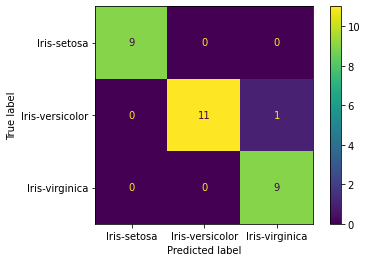

In [ ]:
# Imprimindo a matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, y_test)

In [ ]:
# Medidas de desempenho
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test,average='weighted'))
print("Recall:",recall_score(y_pred,y_test,average='weighted'))
print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1 Score: 0.9665141113653699


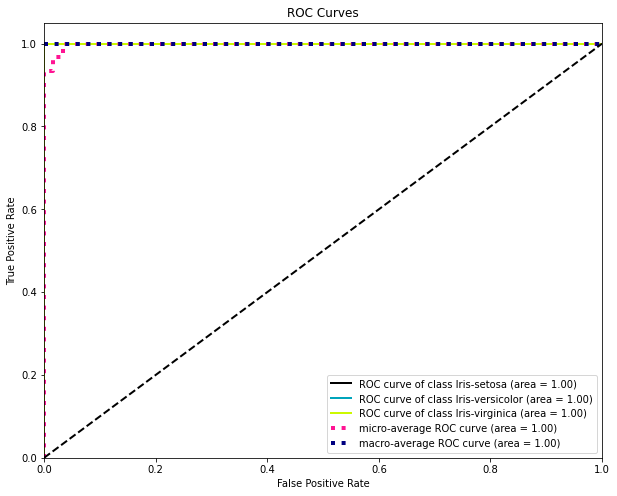

In [ ]:
!pip install scikit-plot
# Plotando a curva ROC para os dados de teste
from scikitplot.metrics import plot_roc
y_probas = log_reg.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(10, 8))   
plt.show()

In [ ]:
# Exemplo de previsão utilizando o modelo treinado
ex_pred = log_reg.predict_proba([[5.1, 3.5, 1.4, 0.2]])
# mostrando resultado em probabilidade
ex_pred

array([[9.77476339e-01, 2.25236104e-02, 5.08330521e-08]])

In [ ]:
# Exemplo de previsão utilizando o modelo treinado
ex_pred = log_reg.predict([[5.1, 3.5, 1.4, 0.2]])
# mostrando resultado 
print('classe = ', ex_pred)

classe =  ['Iris-setosa']


# Exercício Regressão Logística 01 (Aula05_Parte2)

Consulte a documentação do LogisticRegression em https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html e altere alguns hiper-parâmetros do modelo (penalty, C, solver) e realize novos treinamentos para ver se consegue aumentar o desempenho.

Se quiser, varie também o parâmetro (test_size=0.2) para alterar a quantidade de exemplos do teste (ex: 0.3 e 0.4). 

Salve os resultados (Acurácia apenas) em uma tabela, contendo os valores utilizados.

X_train: (105, 4)
y_train: (105,)
X_test: (45, 4)
y_test: (45,)
Accuracy: 0.9777777777777777
Precision: 0.9790849673202615
Recall: 0.9777777777777777
F1 Score: 0.9777313363520261


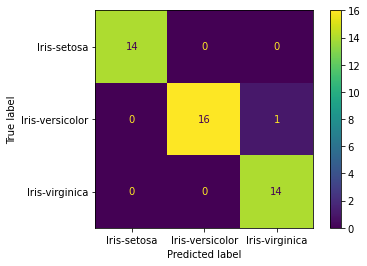

In [ ]:
# Separação entre os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.3, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, penalty='l2',solver='newton-cg', C=0.5)
log_reg.fit(X_train, y_train)

# prevendo valores para X_test
y_pred = log_reg.predict(X_test)

# Imprimindo a matriz de confusão
plot_confusion_matrix(log_reg, X_test, y_test)

# Medidas de desempenho
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test,average='weighted'))
print("Recall:",recall_score(y_pred,y_test,average='weighted'))
print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))

X_train: (105, 4)
y_train: (105,)
X_test: (45, 4)
y_test: (45,)
Accuracy: 0.9777777777777777
Precision: 0.9790849673202615
Recall: 0.9777777777777777
F1 Score: 0.9777313363520261


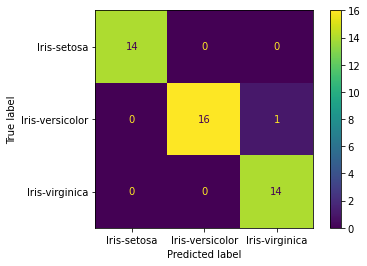

In [ ]:
# Separação entre os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.3, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, penalty='l2',solver='lbfgs', C=0.5)
log_reg.fit(X_train, y_train)

# prevendo valores para X_test
y_pred = log_reg.predict(X_test)

# Imprimindo a matriz de confusão
plot_confusion_matrix(log_reg, X_test, y_test)

# Medidas de desempenho
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test,average='weighted'))
print("Recall:",recall_score(y_pred,y_test,average='weighted'))
print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))

X_train: (105, 4)
y_train: (105,)
X_test: (45, 4)
y_test: (45,)
Accuracy: 0.9555555555555556
Precision: 0.9607843137254902
Recall: 0.9555555555555556
F1 Score: 0.9554629629629631


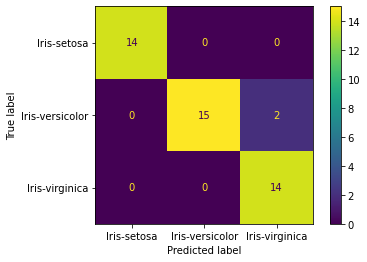

In [ ]:
# Separação entre os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.3, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, penalty='l1',solver='liblinear', C=0.8)
log_reg.fit(X_train, y_train)

# prevendo valores para X_test
y_pred = log_reg.predict(X_test)

# Imprimindo a matriz de confusão
plot_confusion_matrix(log_reg, X_test, y_test)

# Medidas de desempenho
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test,average='weighted'))
print("Recall:",recall_score(y_pred,y_test,average='weighted'))
print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))

X_train: (105, 4)
y_train: (105,)
X_test: (45, 4)
y_test: (45,)
Accuracy: 0.9777777777777777
Precision: 0.9790849673202615
Recall: 0.9777777777777777
F1 Score: 0.9777313363520261


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


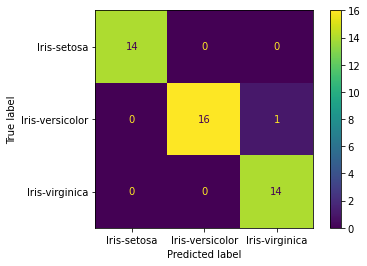

In [ ]:
# Separação entre os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.3, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, penalty='l2',solver='sag', C=0.5)
log_reg.fit(X_train, y_train)

# prevendo valores para X_test
y_pred = log_reg.predict(X_test)

# Imprimindo a matriz de confusão
plot_confusion_matrix(log_reg, X_test, y_test)

# Medidas de desempenho
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test,average='weighted'))
print("Recall:",recall_score(y_pred,y_test,average='weighted'))
print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))

X_train: (105, 4)
y_train: (105,)
X_test: (45, 4)
y_test: (45,)
Accuracy: 0.9777777777777777
Precision: 0.9790849673202615
Recall: 0.9777777777777777
F1 Score: 0.9777313363520261


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


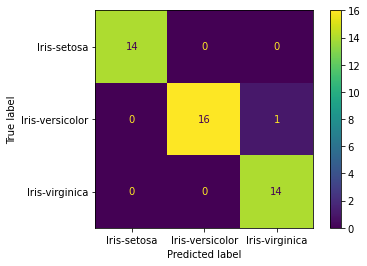

In [ ]:
# Separação entre os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.3, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, penalty='l2',solver='saga', C=0.5)
log_reg.fit(X_train, y_train)

# prevendo valores para X_test
y_pred = log_reg.predict(X_test)

# Imprimindo a matriz de confusão
plot_confusion_matrix(log_reg, X_test, y_test)

# Medidas de desempenho
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test,average='weighted'))
print("Recall:",recall_score(y_pred,y_test,average='weighted'))
print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))

#RESULTADO DA ACURÁCIA

Hiperpârametros | Accuracy
--- | ------
Newton-cg | 0.9777777777777777
Ibfgs | 0.9777777777777777
sag | 0.9777777777777777
saga | 0.9777777777777777
Liblinear | 0.9555555555555556

FIM